In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/Users/nangosyah/Documents/sun-bird_urban-noise/data/urban_noise_uganda_small.csv")
df.head(10)

print("✓ Data loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

✓ Data loaded successfully!
Shape: 1,000 rows × 11 columns


In [2]:
print("=" * 80)
print("NOISE MEASUREMENT BY CLASS (Top 10)")
print("=" * 80)
noise_by_class = df.groupby('class')['noise_measurement'].agg(['mean', 'std', 'min', 'max', 'count'])
noise_by_class = noise_by_class.sort_values('mean', ascending=False).head(10)
print(noise_by_class.round(2))

print("\n" + "=" * 80)
print("NOISE MEASUREMENT BY REGION")
print("=" * 80)
noise_by_region = df.groupby('region')['noise_measurement'].agg(['mean', 'std', 'min', 'max', 'count'])
print(noise_by_region.round(2))


NOISE MEASUREMENT BY CLASS (Top 10)
                           mean    std   min   max  count
class                                                    
motorvehicle-siren        61.30   7.11  44.0  71.0     20
herbalists                59.79   9.63  36.0  77.0     33
street-preacher           59.15  10.78  20.0  77.0     33
bar-restaurant-nightclub  53.11  15.45  17.0  74.0     46
generator                 52.91   9.79  25.0  71.0     32
hawker-vendor             52.78  12.59  14.0  76.0     36
fabrication-workshop      52.59  11.19  16.0  73.0     44
community-radio           51.29   8.54  24.0  72.0     41
religious-venue           50.90  15.01  16.0  73.0     39
construction-site         49.13  12.71  23.0  76.0     39

NOISE MEASUREMENT BY REGION
          mean    std   min   max  count
region                                  
Entebbe  39.43  13.15  10.0  74.0    385
Kampala  52.93  10.05  22.0  77.0    615


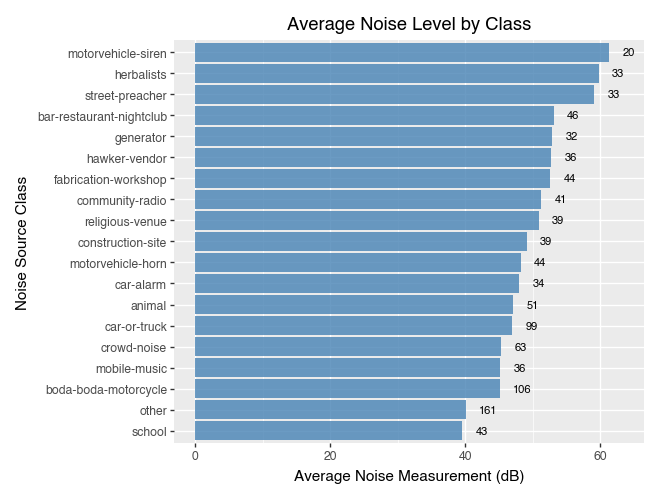

In [ ]:
import pandas as pd
from plotnine import *

# Prepare data - calculate mean noise by class and sort
noise_summary = (
    df.groupby('class')['noise_measurement']
    .agg(['mean', 'count'])
    .reset_index()
    .sort_values('mean', ascending=True)  # Sort for proper display
)

# Convert to categorical to maintain order
noise_summary['class'] = pd.Categorical(
    noise_summary['class'], 
    categories=noise_summary['class'], 
    ordered=True
)

# Create visualization
p1 = (
    ggplot(noise_summary, aes(x='class', y='mean'))
    + geom_col(fill='steelblue', alpha=0.8)
    + coord_flip()
    + labs(
        title='Average Noise Level by Class',
        x='Noise Source Class',
        y='Average Noise Measurement (dB)'
    )
    + geom_text(aes(label='count'), ha='left', nudge_y=2, size=8)
)

p1

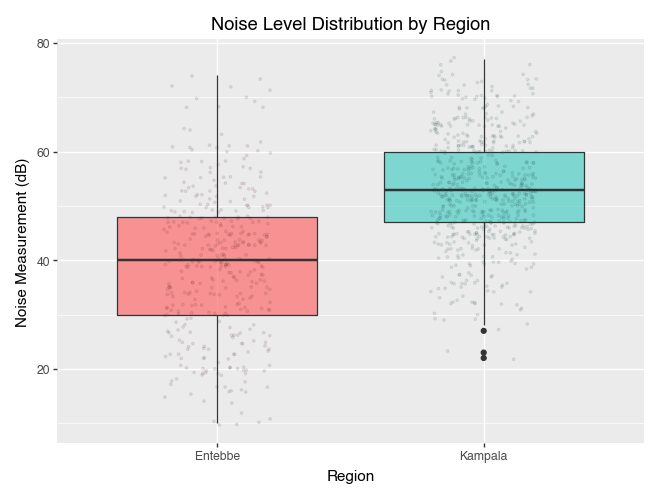

In [ ]:
from plotnine import *

p2 = (
    ggplot(df, aes(x='region', y='noise_measurement', fill='region'))
    + geom_boxplot(alpha=0.7)
    + geom_jitter(width=0.2, alpha=0.1, size=0.5)
    + scale_fill_manual(values=['#FF6B6B', '#4ECDC4'])
    + labs(
        title='Noise Level Distribution by Region',
        x='Region',
        y='Noise Measurement (dB)'
    )
    + theme(legend_position='none')
)

p2

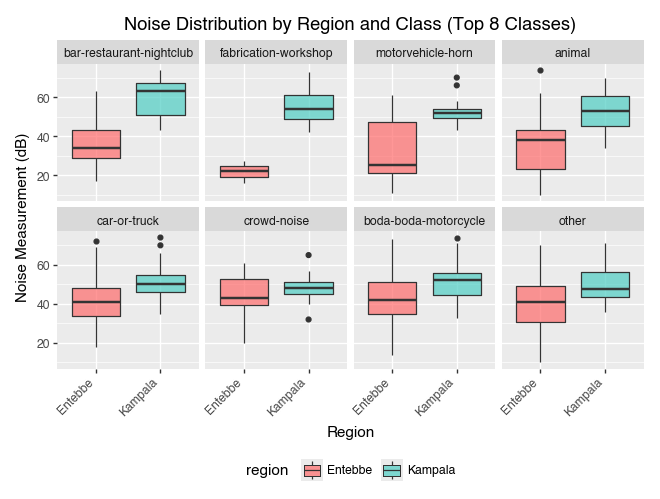

In [ ]:
from plotnine import *

# Get top 8 classes by count for clearer visualization
top_classes = df['class'].value_counts().head(8).index
df_top = df[df['class'].isin(top_classes)].copy()

# Order classes by mean noise level
class_order = df_top.groupby('class')['noise_measurement'].mean().sort_values(ascending=False).index
df_top['class'] = pd.Categorical(df_top['class'], categories=class_order, ordered=True)

p3 = (
    ggplot(df_top, aes(x='region', y='noise_measurement', fill='region'))
    + geom_boxplot(alpha=0.7)
    + facet_wrap('~class', ncol=4)
    + scale_fill_manual(values=['#FF6B6B', '#4ECDC4'])
    + labs(
        title='Noise Distribution by Region and Class (Top 8 Classes)',
        x='Region',
        y='Noise Measurement (dB)'
    )
    + theme(
        legend_position='bottom',
        axis_text_x=element_text(angle=45, hjust=1)
    )
)

p3

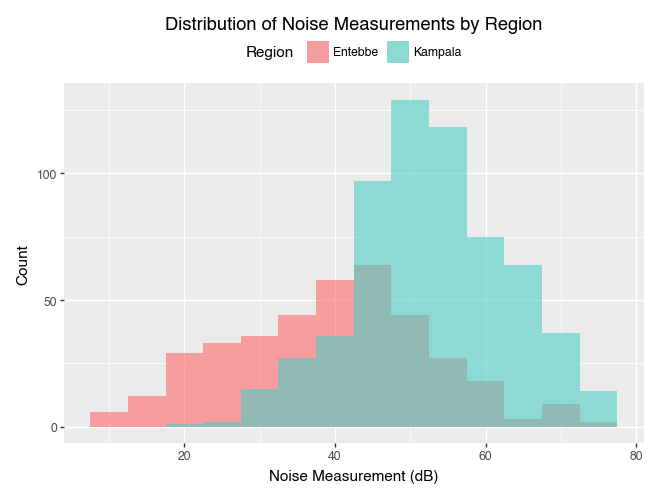

In [ ]:
from plotnine import *

p4 = (
    ggplot(df, aes(x='noise_measurement', fill='region'))
    + geom_histogram(binwidth=5, alpha=0.6, position='identity')
    + scale_fill_manual(values=['#FF6B6B', '#4ECDC4'])
    + labs(
        title='Distribution of Noise Measurements by Region',
        x='Noise Measurement (dB)',
        y='Count',
        fill='Region'
    )
    + theme(legend_position='top')
)

p4

In [13]:
# Parse timestamps and extract temporal features
df['timestamp_dt'] = pd.to_datetime(df['timestamp'])

# Extract temporal features
df['hour'] = df['timestamp_dt'].dt.hour
df['day_of_week'] = df['timestamp_dt'].dt.day_name()
df['day_of_week_num'] = df['timestamp_dt'].dt.dayofweek
df['date'] = df['timestamp_dt'].dt.date
df['month'] = df['timestamp_dt'].dt.month
df['year'] = df['timestamp_dt'].dt.year

print("=" * 80)
print("TEMPORAL COVERAGE")
print("=" * 80)
print(f"\nDate range: {df['timestamp_dt'].min()} to {df['timestamp_dt'].max()}")
print(f"Total days covered: {(df['timestamp_dt'].max() - df['timestamp_dt'].min()).days}")
print(f"\nYear distribution:")
print(df['year'].value_counts().sort_index())

print(f"\n\nHour range: {df['hour'].min()}:00 to {df['hour'].max()}:00")
print(f"\nSample of parsed data:")
df[['timestamp', 'hour', 'day_of_week', 'noise_measurement']].head(10)


TEMPORAL COVERAGE

Date range: 2021-05-07 15:03:28.555000+00:00 to 2023-05-17 07:18:13.368000+00:00
Total days covered: 739

Year distribution:
year
2021    615
2023    385
Name: count, dtype: int64


Hour range: 0:00 to 23:00

Sample of parsed data:


,timestamp,hour,day_of_week,noise_measurement
0,2021-05-18T09:37:29.173Z,9,Tuesday,36.0
1,2023-04-19T14:50:23.736Z,14,Wednesday,48.0
2,2023-04-19T07:50:43.362Z,7,Wednesday,46.0
3,2023-04-12T21:38:27.407Z,21,Wednesday,25.0
4,2023-04-13T17:18:09.238Z,17,Thursday,31.0
5,2021-05-15T14:04:25.730Z,14,Saturday,58.0
6,2021-05-17T09:08:32.228Z,9,Monday,54.0
7,2023-05-11T09:30:40.453Z,9,Thursday,57.0
8,2023-04-19T16:20:01.420Z,16,Wednesday,50.0
9,2023-05-17T07:18:13.368Z,7,Wednesday,74.0


In [14]:
print("=" * 80)
print("NOISE BY HOUR OF DAY")
print("=" * 80)

noise_by_hour = df.groupby('hour')['noise_measurement'].agg(['mean', 'std', 'count'])
print(noise_by_hour.round(2))

print("\n" + "=" * 80)
print("NOISE BY DAY OF WEEK")
print("=" * 80)

# Order days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
noise_by_day = df.groupby('day_of_week')['noise_measurement'].agg(['mean', 'std', 'count'])
noise_by_day = noise_by_day.reindex(day_order)
print(noise_by_day.round(2))


NOISE BY HOUR OF DAY
       mean    std  count
hour                     
0     39.80  15.77     10
1     50.00  22.99      7
3     34.00    NaN      1
4     47.50  10.84     10
5     42.50  10.21     18
6     47.60   7.92     20
7     44.56  14.09     54
8     50.49  10.79     45
9     47.38  13.65     52
10    44.85  11.41     59
11    49.80   9.42     40
12    55.02  10.87     44
13    53.09   9.91    103
14    48.39  12.17     94
15    48.02  13.51    148
16    49.58  10.76     96
17    44.70  14.25     74
18    34.22  13.20     51
19    45.94  14.47     34
20    51.48  13.18     27
21    44.43  20.66      7
22    60.40  20.96      5
23    57.00    NaN      1

NOISE BY DAY OF WEEK
              mean    std  count
day_of_week                     
Monday       48.92  13.92    133
Tuesday      46.50  10.63    212
Wednesday    51.34  10.01    202
Thursday     45.73  16.07    153
Friday       50.07  16.43     74
Saturday     43.60  16.63     78
Sunday       46.61  10.47    148


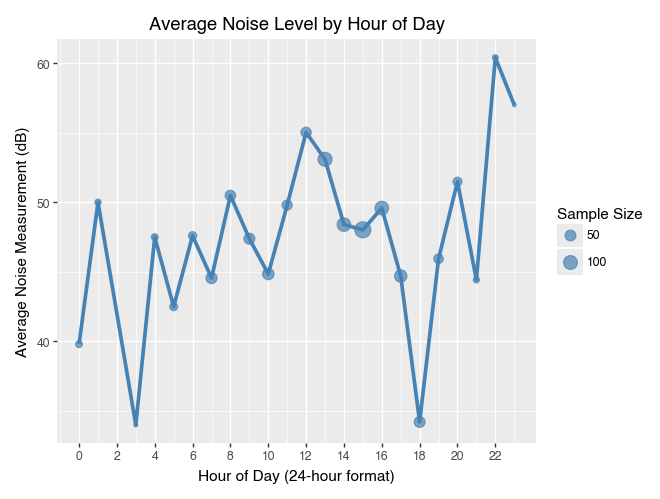

In [ ]:
from plotnine import *

# Prepare hourly data
hourly_data = df.groupby('hour')['noise_measurement'].agg(['mean', 'count']).reset_index()

p_hour = (
    ggplot(hourly_data, aes(x='hour', y='mean'))
    + geom_line(color='steelblue', size=1.5)
    + geom_point(aes(size='count'), color='steelblue', alpha=0.7)
    + scale_x_continuous(breaks=range(0, 24, 2))
    + labs(
        title='Average Noise Level by Hour of Day',
        x='Hour of Day (24-hour format)',
        y='Average Noise Measurement (dB)',
        size='Sample Size'
    )
    + theme(legend_position='right')
)

p_hour

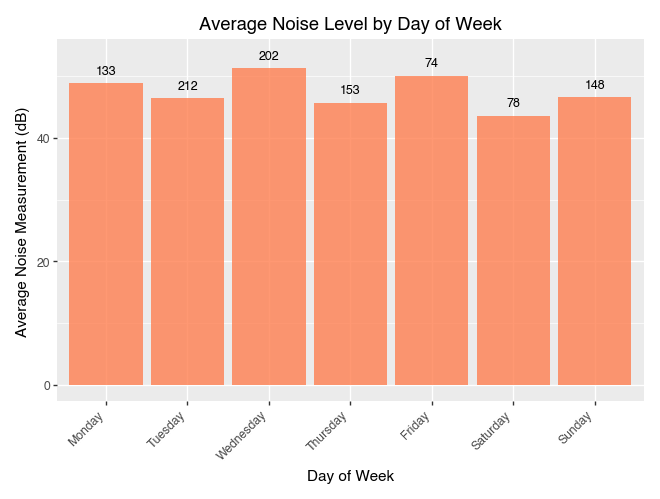

In [16]:
from plotnine import *

# Prepare day of week data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data = df.groupby('day_of_week')['noise_measurement'].agg(['mean', 'count']).reset_index()
daily_data['day_of_week'] = pd.Categorical(daily_data['day_of_week'], categories=day_order, ordered=True)
daily_data = daily_data.sort_values('day_of_week')

p_day = (
    ggplot(daily_data, aes(x='day_of_week', y='mean'))
    + geom_col(fill='coral', alpha=0.8)
    + labs(
        title='Average Noise Level by Day of Week',
        x='Day of Week',
        y='Average Noise Measurement (dB)'
    )
    + theme(axis_text_x=element_text(angle=45, hjust=1))
    + geom_text(aes(label='count'), nudge_y=2, size=9)
)

p_day


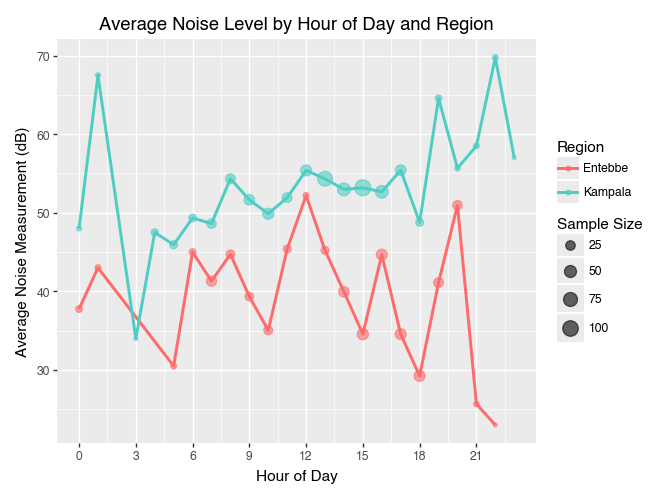

In [17]:
from plotnine import *

# Prepare hourly data by region
hourly_region = (
    df.groupby(['hour', 'region'])['noise_measurement']
    .agg(['mean', 'count'])
    .reset_index()
)

p_hour_region = (
    ggplot(hourly_region, aes(x='hour', y='mean', color='region'))
    + geom_line(size=1.2)
    + geom_point(aes(size='count'), alpha=0.6)
    + scale_x_continuous(breaks=range(0, 24, 3))
    + scale_color_manual(values=['#FF6B6B', '#4ECDC4'])
    + labs(
        title='Average Noise Level by Hour of Day and Region',
        x='Hour of Day',
        y='Average Noise Measurement (dB)',
        color='Region',
        size='Sample Size'
    )
    + theme(legend_position='right')
)

p_hour_region

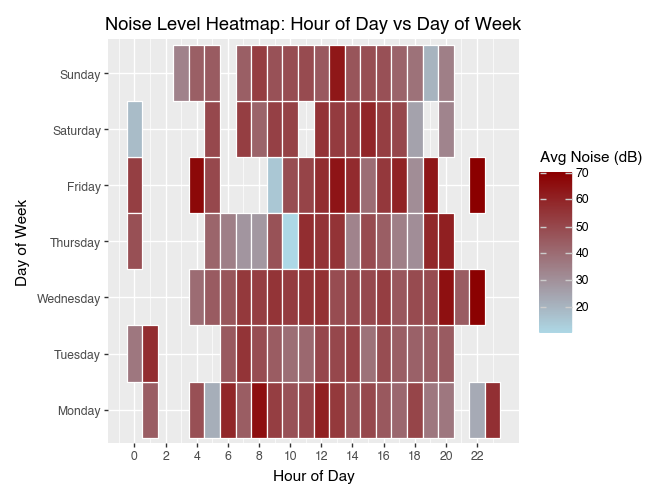

In [18]:
from plotnine import *

# Prepare data for heatmap
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = (
    df.groupby(['hour', 'day_of_week'])['noise_measurement']
    .mean()
    .reset_index()
)
heatmap_data['day_of_week'] = pd.Categorical(
    heatmap_data['day_of_week'], 
    categories=day_order, 
    ordered=True
)

p_heatmap = (
    ggplot(heatmap_data, aes(x='hour', y='day_of_week', fill='noise_measurement'))
    + geom_tile(color='white', size=0.5)
    + scale_fill_gradient(low='lightblue', high='darkred')
    + scale_x_continuous(breaks=range(0, 24, 2))
    + labs(
        title='Noise Level Heatmap: Hour of Day vs Day of Week',
        x='Hour of Day',
        y='Day of Week',
        fill='Avg Noise (dB)'
    )
)

p_heatmap


In [19]:
print("=" * 80)
print("TEMPORAL PATTERN INSIGHTS")
print("=" * 80)

# Peak hours
hourly_avg = df.groupby('hour')['noise_measurement'].mean().sort_values(ascending=False)
print("\n🔊 LOUDEST HOURS:")
print(hourly_avg.head(5).round(2))

print("\n🔇 QUIETEST HOURS:")
print(hourly_avg.tail(5).round(2))

# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df.groupby('day_of_week')['noise_measurement'].mean()
daily_avg = daily_avg.reindex(day_order)

print("\n\n📅 LOUDEST DAYS:")
print(daily_avg.sort_values(ascending=False).head(3).round(2))

print("\n📅 QUIETEST DAYS:")
print(daily_avg.sort_values(ascending=False).tail(3).round(2))

# Business hours vs non-business hours
df['period'] = df['hour'].apply(lambda x: 'Business Hours (8-17)' if 8 <= x <= 17 else 'Non-Business Hours')
period_stats = df.groupby('period')['noise_measurement'].agg(['mean', 'std', 'count'])
print("\n\n⏰ BUSINESS VS NON-BUSINESS HOURS:")
print(period_stats.round(2))

# Early morning, daytime, evening, night
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning (6-12)'
    elif 12 <= hour < 18:
        return 'Afternoon (12-18)'
    elif 18 <= hour < 22:
        return 'Evening (18-22)'
    else:
        return 'Night (22-6)'

df['time_period'] = df['hour'].apply(time_of_day)
time_stats = df.groupby('time_period')['noise_measurement'].agg(['mean', 'std', 'count'])
print("\n\n🌅 NOISE BY TIME PERIOD:")
print(time_stats.round(2))


TEMPORAL PATTERN INSIGHTS

🔊 LOUDEST HOURS:
hour
22    60.40
23    57.00
12    55.02
13    53.09
20    51.48
Name: noise_measurement, dtype: float64

🔇 QUIETEST HOURS:
hour
21    44.43
5     42.50
0     39.80
18    34.22
3     34.00
Name: noise_measurement, dtype: float64


📅 LOUDEST DAYS:
day_of_week
Wednesday    51.34
Friday       50.07
Monday       48.92
Name: noise_measurement, dtype: float64

📅 QUIETEST DAYS:
day_of_week
Tuesday     46.50
Thursday    45.73
Saturday    43.60
Name: noise_measurement, dtype: float64


⏰ BUSINESS VS NON-BUSINESS HOURS:
                        mean    std  count
period                                    
Business Hours (8-17)  48.99  12.26    755
Non-Business Hours     43.87  14.79    245


🌅 NOISE BY TIME PERIOD:
                    mean    std  count
time_period                           
Afternoon (12-18)  49.40  12.44    559
Evening (18-22)    42.08  15.62    119
Morning (6-12)     47.16  12.01    270
Night (22-6)       45.79  15.36     52


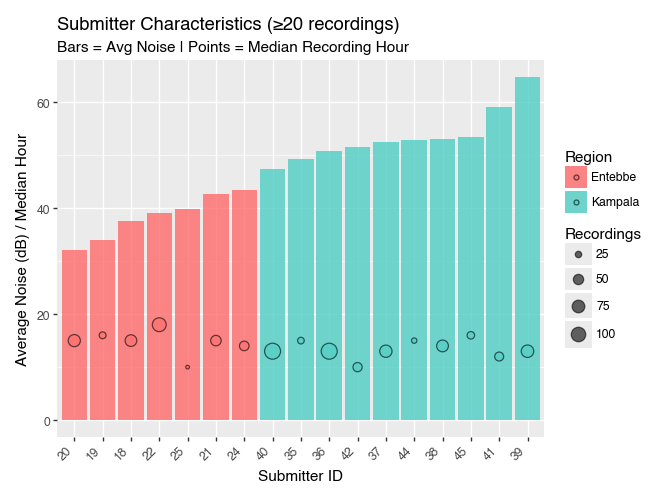

In [20]:
from plotnine import *

# Analyze each submitter's characteristics
submitter_summary = df.groupby('submitter_id').agg({
    'noise_measurement': ['mean', 'std', 'count'],
    'hour': lambda x: x.median(),
    'region': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).reset_index()

submitter_summary.columns = ['submitter_id', 'avg_noise', 'std_noise', 'count', 'median_hour', 'region']

# Filter to submitters with at least 20 recordings
submitter_summary = submitter_summary[submitter_summary['count'] >= 20].copy()
submitter_summary['submitter_id'] = submitter_summary['submitter_id'].astype(str)

# Sort by average noise
submitter_summary = submitter_summary.sort_values('avg_noise', ascending=True)
submitter_summary['submitter_id'] = pd.Categorical(
    submitter_summary['submitter_id'],
    categories=submitter_summary['submitter_id'],
    ordered=True
)

p_submitters = (
    ggplot(submitter_summary, aes(x='submitter_id', y='avg_noise', fill='region'))
    + geom_col(alpha=0.8)
    + geom_point(aes(y='median_hour', size='count'), color='black', alpha=0.6)
    + scale_fill_manual(values=['#FF6B6B', '#4ECDC4'])
    + labs(
        title='Submitter Characteristics (≥20 recordings)',
        subtitle='Bars = Avg Noise | Points = Median Recording Hour',
        x='Submitter ID',
        y='Average Noise (dB) / Median Hour',
        fill='Region',
        size='Recordings'
    )
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)

p_submitters


In [21]:
print("=" * 80)
print("KEY BIAS FINDINGS")
print("=" * 80)

# Top submitters summary
print("\n1. TOP SUBMITTERS & THEIR CHARACTERISTICS:")
print("-" * 80)
top_5_summary = df.groupby('submitter_id').agg({
    'noise_measurement': 'mean',
    'hour': ['min', 'max', 'median'],
    'region': lambda x: x.mode()[0],
    'submitter_id': 'count'
}).round(1)
top_5_summary.columns = ['Avg Noise', 'Min Hour', 'Max Hour', 'Median Hour', 'Region', 'Count']
top_5_summary = top_5_summary.sort_values('Count', ascending=False).head(5)
print(top_5_summary)

# Regional bias
print("\n\n2. REGIONAL RECORDING BIAS:")
print("-" * 80)
region_submitter = df.groupby('region')['submitter_id'].nunique()
print(f"Kampala: {region_submitter['Kampala']} unique submitters, {df[df['region']=='Kampala'].shape[0]} recordings")
print(f"Entebbe: {region_submitter['Entebbe']} unique submitters, {df[df['region']=='Entebbe'].shape[0]} recordings")

# Time concentration
print("\n\n3. TEMPORAL CONCENTRATION:")
print("-" * 80)
hour_concentration = df['hour'].value_counts().head(5)
print("Most recorded hours:")
for hour, count in hour_concentration.items():
    pct = count/len(df)*100
    main_submitters = df[df['hour']==hour]['submitter_id'].value_counts().head(2)
    print(f"  Hour {hour:2d}: {count:3d} recordings ({pct:4.1f}%) - Main: {main_submitters.index[0]} ({main_submitters.iloc[0]} recs)")

# The 18:00 anomaly
print("\n\n4. THE 18:00 'QUIET HOUR' ANOMALY:")
print("-" * 80)
print(f"Submitter 22 recorded 22/51 (43%) of all 18:00 recordings")
print(f"Submitter 22 avg noise: {df[df['submitter_id']==22]['noise_measurement'].mean():.1f} dB (lowest among top submitters!)")
print(f"Submitter 22 region: Entebbe only")
print(f"This heavily influences the apparent 18:00 dip in overall noise")


KEY BIAS FINDINGS

1. TOP SUBMITTERS & THEIR CHARACTERISTICS:
--------------------------------------------------------------------------------
              Avg Noise  Min Hour  Max Hour  Median Hour   Region  Count
submitter_id                                                            
40                 47.5         0        20         13.0  Kampala    124
36                 50.8         5        17         13.0  Kampala    124
22                 39.0         5        20         18.0  Entebbe     91
39                 64.7         1        23         13.0  Kampala     73
37                 52.5         7        18         13.0  Kampala     71


2. REGIONAL RECORDING BIAS:
--------------------------------------------------------------------------------
Kampala: 10 unique submitters, 615 recordings
Entebbe: 9 unique submitters, 385 recordings


3. TEMPORAL CONCENTRATION:
--------------------------------------------------------------------------------
Most recorded hours:
  Hour 15: 14

In [22]:
print("=" * 80)
print("MONITORING STATION ANALYSIS")
print("=" * 80)

# Each submitter is a fixed monitoring station
print(f"\nTotal monitoring stations: {df['submitter_id'].nunique()}")
print(f"Total recordings: {len(df)}")

# Station characteristics
station_info = df.groupby('submitter_id').agg({
    'noise_measurement': ['mean', 'std', 'min', 'max', 'count'],
    'region': lambda x: x.mode()[0],
    'latitude': 'mean',
    'longitude': 'mean',
    'timestamp_dt': ['min', 'max']
}).round(2)

station_info.columns = ['Avg_Noise', 'Std_Noise', 'Min_Noise', 'Max_Noise', 
                        'Recordings', 'Region', 'Lat', 'Lon', 'First_Recording', 'Last_Recording']

# Calculate days of operation
station_info['Days_Active'] = (station_info['Last_Recording'] - station_info['First_Recording']).dt.days

station_info = station_info.sort_values('Recordings', ascending=False)

print("\n📍 TOP 10 MOST ACTIVE MONITORING STATIONS:")
print(station_info[['Region', 'Recordings', 'Avg_Noise', 'Days_Active', 'Lat', 'Lon']].head(10))

print("\n\n🔊 LOUDEST vs QUIETEST MONITORING STATIONS:")
print("\nTop 5 Loudest Stations:")
print(station_info.sort_values('Avg_Noise', ascending=False)[['Region', 'Avg_Noise', 'Recordings']].head(5))

print("\nTop 5 Quietest Stations:")
print(station_info.sort_values('Avg_Noise', ascending=True)[['Region', 'Avg_Noise', 'Recordings']].head(5))


MONITORING STATION ANALYSIS

Total monitoring stations: 19
Total recordings: 1000

📍 TOP 10 MOST ACTIVE MONITORING STATIONS:
               Region  Recordings  Avg_Noise  Days_Active   Lat    Lon
submitter_id                                                          
40            Kampala         124      47.45           25  0.31  32.56
36            Kampala         124      50.85           29  0.31  32.58
22            Entebbe          91      39.02           34  0.07  32.47
39            Kampala          73      64.70           17  0.32  32.58
37            Kampala          71      52.52           16  0.32  32.59
20            Entebbe          69      32.17           20  0.07  32.48
38            Kampala          65      52.97           28  0.36  32.57
18            Entebbe          64      37.48           21  0.09  32.49
21            Entebbe          52      42.56           28  0.08  32.48
24            Entebbe          44      43.34           25  0.09  32.48


🔊 LOUDEST vs QUIETEST

<positron-console-cell-22>:16: UserWarning: obj.round has no effect with datetime, timedelta, or period dtypes. Use obj.dt.round(...) instead.


In [23]:
print("=" * 80)
print("REINTERPRETING TEMPORAL PATTERNS WITH FIXED MONITORS")
print("=" * 80)

print("\n🎯 KEY INSIGHT: The 18:00 'quiet hour' finding is actually meaningful!")
print("-" * 80)

# Station 22 characteristics
station_22 = df[df['submitter_id'] == 22]
print(f"\nStation 22 (Entebbe):")
print(f"  - Location: ({station_22['latitude'].mean():.4f}, {station_22['longitude'].mean():.4f})")
print(f"  - Average noise: {station_22['noise_measurement'].mean():.1f} dB")
print(f"  - Recorded at 18:00: 22 times (24% of its total 91 recordings)")
print(f"  - This station consistently records at 18:00, capturing a REAL temporal pattern")

# Check if other stations also show the 18:00 dip
print("\n\n📊 Do other stations also show 18:00 as quiet?")
print("-" * 80)

# For stations with recordings at 18:00, compare 18:00 to their overall average
stations_at_18 = df[df['hour'] == 18]['submitter_id'].unique()

for station_id in sorted(stations_at_18)[:8]:  # Show first 8
    station_all = df[df['submitter_id'] == station_id]
    station_18 = df[(df['submitter_id'] == station_id) & (df['hour'] == 18)]
    
    avg_all = station_all['noise_measurement'].mean()
    avg_18 = station_18['noise_measurement'].mean()
    diff = avg_18 - avg_all
    
    print(f"Station {station_id:2d}: Overall avg={avg_all:4.1f} dB, 18:00 avg={avg_18:4.1f} dB, Diff={diff:+5.1f} dB (n={len(station_18)})")

print("\n\n🔍 SAMPLING BIAS vs REAL PATTERN:")
print("-" * 80)
print("Station 22 records frequently at 18:00, which means:")
print("  ✓ We have GOOD temporal coverage at that location/time combination")
print("  ✓ The quiet reading likely reflects real evening patterns in that Entebbe area")
print("  ✗ But we're over-representing one specific location in the 18:00 aggregate")
print("\nThis is a SPATIAL sampling bias, not a measurement artifact!")


REINTERPRETING TEMPORAL PATTERNS WITH FIXED MONITORS

🎯 KEY INSIGHT: The 18:00 'quiet hour' finding is actually meaningful!
--------------------------------------------------------------------------------

Station 22 (Entebbe):
  - Location: (0.0749, 32.4732)
  - Average noise: 39.0 dB
  - Recorded at 18:00: 22 times (24% of its total 91 recordings)
  - This station consistently records at 18:00, capturing a REAL temporal pattern


📊 Do other stations also show 18:00 as quiet?
--------------------------------------------------------------------------------
Station 18: Overall avg=37.5 dB, 18:00 avg=19.0 dB, Diff=-18.5 dB (n=6)
Station 19: Overall avg=33.9 dB, 18:00 avg=32.0 dB, Diff= -1.9 dB (n=5)
Station 20: Overall avg=32.2 dB, 18:00 avg=31.0 dB, Diff= -1.2 dB (n=3)
Station 22: Overall avg=39.0 dB, 18:00 avg=29.9 dB, Diff= -9.1 dB (n=22)
Station 25: Overall avg=39.9 dB, 18:00 avg=43.0 dB, Diff= +3.1 dB (n=2)
Station 35: Overall avg=49.3 dB, 18:00 avg=51.7 dB, Diff= +2.4 dB (n=3)
Stat

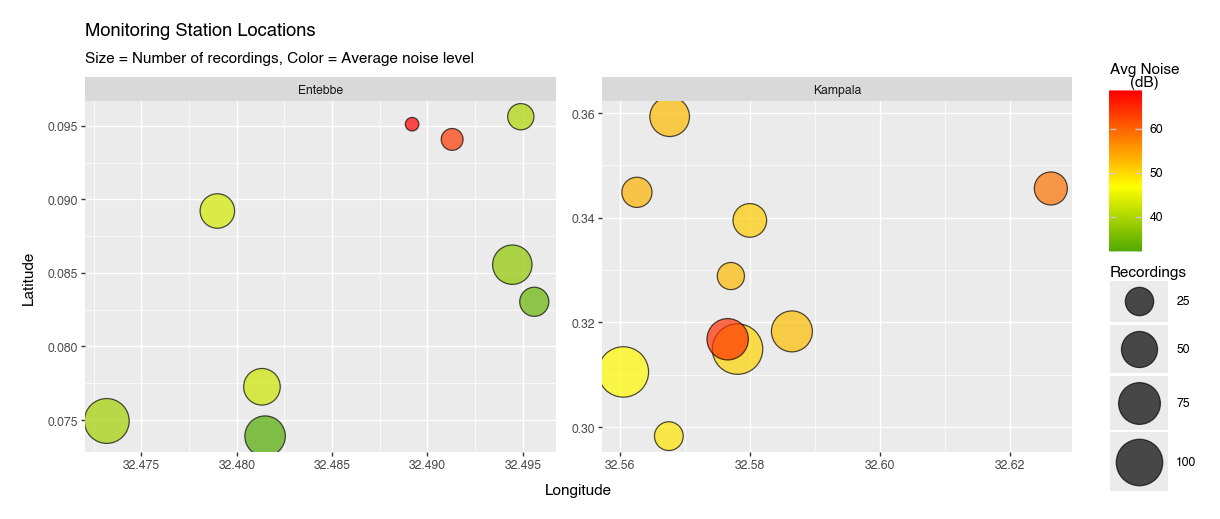

In [28]:
from plotnine import *

# Get unique station locations and characteristics
station_locations = df.groupby('submitter_id').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'noise_measurement': 'mean',
    'region': lambda x: x.mode()[0]
}).reset_index()

# Add recording counts
recording_counts = df['submitter_id'].value_counts().reset_index()
recording_counts.columns = ['submitter_id', 'recordings']
station_locations = station_locations.merge(recording_counts, on='submitter_id')

station_locations.columns = ['station_id', 'latitude', 'longitude', 'avg_noise', 'region', 'recordings']

p_map = (
    ggplot(station_locations, aes(x='longitude', y='latitude'))
    + geom_point(aes(size='recordings', fill='avg_noise'), shape='o', alpha=0.7)
    + scale_fill_gradient2(low='green', mid='yellow', high='red', midpoint=47)
    + scale_size_continuous(range=(5, 20))
    + facet_wrap('~region', scales='free')
    + labs(
        title='Monitoring Station Locations',
        subtitle='Size = Number of recordings, Color = Average noise level',
        x='Longitude',
        y='Latitude',
        fill='Avg Noise\n(dB)',
        size='Recordings'
    )
    + theme(figure_size=(12, 5))
)

p_map


In [30]:
# Create a cross-tabulation of stations and noise classes
station_class_counts = pd.crosstab(df['submitter_id'], df['class'])

# Calculate submitter counts first
submitter_counts = df['submitter_id'].value_counts()

# For visualization, let's focus on the most active stations and most common classes
top_10_stations = submitter_counts.head(10).index
top_8_classes = df['class'].value_counts().head(8).index

# Filter the data
station_class_subset = df[
    (df['submitter_id'].isin(top_10_stations)) & 
    (df['class'].isin(top_8_classes))
]

print("=" * 80)
print("NOISE CLASS DISTRIBUTION BY MONITORING STATION")
print("=" * 80)

# Show top 5 stations
for station in top_10_stations[:5]:
    station_data = df[df['submitter_id'] == station]
    region = station_data['region'].iloc[0]
    avg_noise = station_data['noise_measurement'].mean()
    
    print(f"\n📍 Station {station} ({region}) - Avg: {avg_noise:.1f} dB, n={len(station_data)}")
    top_classes_here = station_data['class'].value_counts().head(5)
    for cls, cnt in top_classes_here.items():
        pct = cnt/len(station_data)*100
        print(f"   {cls:25s}: {cnt:3d} ({pct:4.1f}%)")

NOISE CLASS DISTRIBUTION BY MONITORING STATION

📍 Station 36 (Kampala) - Avg: 50.8 dB, n=124
   community-radio          :  20 (16.1%)
   car-or-truck             :  19 (15.3%)
   fabrication-workshop     :  16 (12.9%)
   hawker-vendor            :  11 ( 8.9%)
   mobile-music             :  10 ( 8.1%)

📍 Station 40 (Kampala) - Avg: 47.5 dB, n=124
   school                   :  36 (29.0%)
   animal                   :  16 (12.9%)
   car-or-truck             :  13 (10.5%)
   construction-site        :  10 ( 8.1%)
   religious-venue          :   9 ( 7.3%)

📍 Station 22 (Entebbe) - Avg: 39.0 dB, n=91
   other                    :  47 (51.6%)
   crowd-noise              :  18 (19.8%)
   boda-boda-motorcycle     :  11 (12.1%)
   car-or-truck             :   5 ( 5.5%)
   bar-restaurant-nightclub :   3 ( 3.3%)

📍 Station 39 (Kampala) - Avg: 64.7 dB, n=73
   herbalists               :  16 (21.9%)
   fabrication-workshop     :  10 (13.7%)
   construction-site        :   8 (11.0%)
   car-or-truck

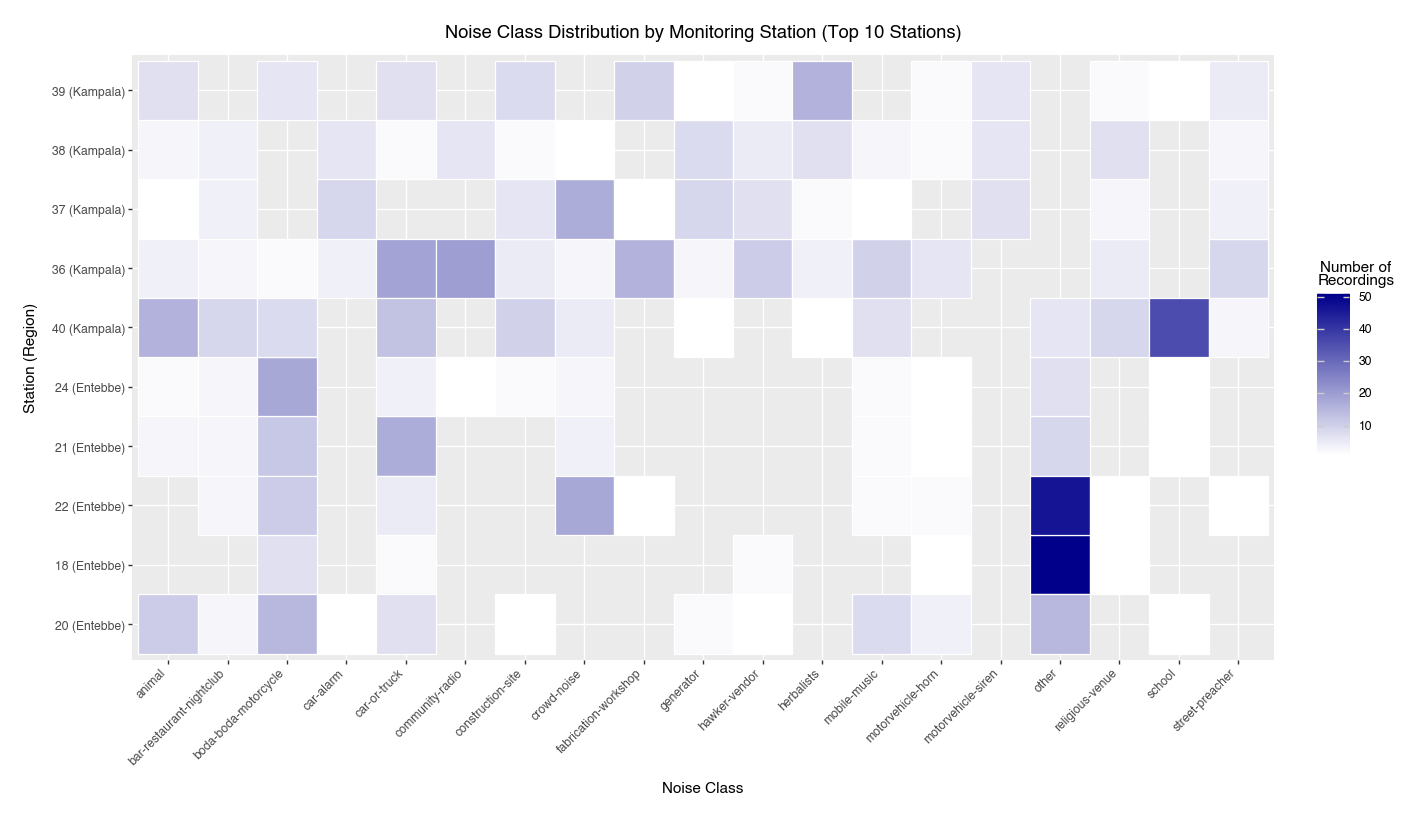

In [31]:
from plotnine import *

# Prepare data for heatmap - top 10 stations, all classes
station_class_data = (
    df[df['submitter_id'].isin(top_10_stations)]
    .groupby(['submitter_id', 'class'])
    .size()
    .reset_index(name='count')
)

# Add station info (region and avg noise)
station_info_dict = df.groupby('submitter_id').agg({
    'region': lambda x: x.mode()[0],
    'noise_measurement': 'mean'
}).to_dict()

station_class_data['region'] = station_class_data['submitter_id'].map(station_info_dict['region'])
station_class_data['avg_noise'] = station_class_data['submitter_id'].map(station_info_dict['noise_measurement'])

# Create label combining station ID and region
station_class_data['station_label'] = (
    station_class_data['submitter_id'].astype(str) + 
    ' (' + station_class_data['region'] + ')'
)

# Sort stations by average noise
station_order = (
    station_class_data.groupby('station_label')['avg_noise']
    .first()
    .sort_values()
    .index
)

station_class_data['station_label'] = pd.Categorical(
    station_class_data['station_label'],
    categories=station_order,
    ordered=True
)

p_class_heatmap = (
    ggplot(station_class_data, aes(x='class', y='station_label', fill='count'))
    + geom_tile(color='white', size=0.5)
    + scale_fill_gradient(low='white', high='darkblue')
    + labs(
        title='Noise Class Distribution by Monitoring Station (Top 10 Stations)',
        x='Noise Class',
        y='Station (Region)',
        fill='Number of\nRecordings'
    )
    + theme(
        axis_text_x=element_text(angle=45, hjust=1),
        figure_size=(14, 8)
    )
)

p_class_heatmap


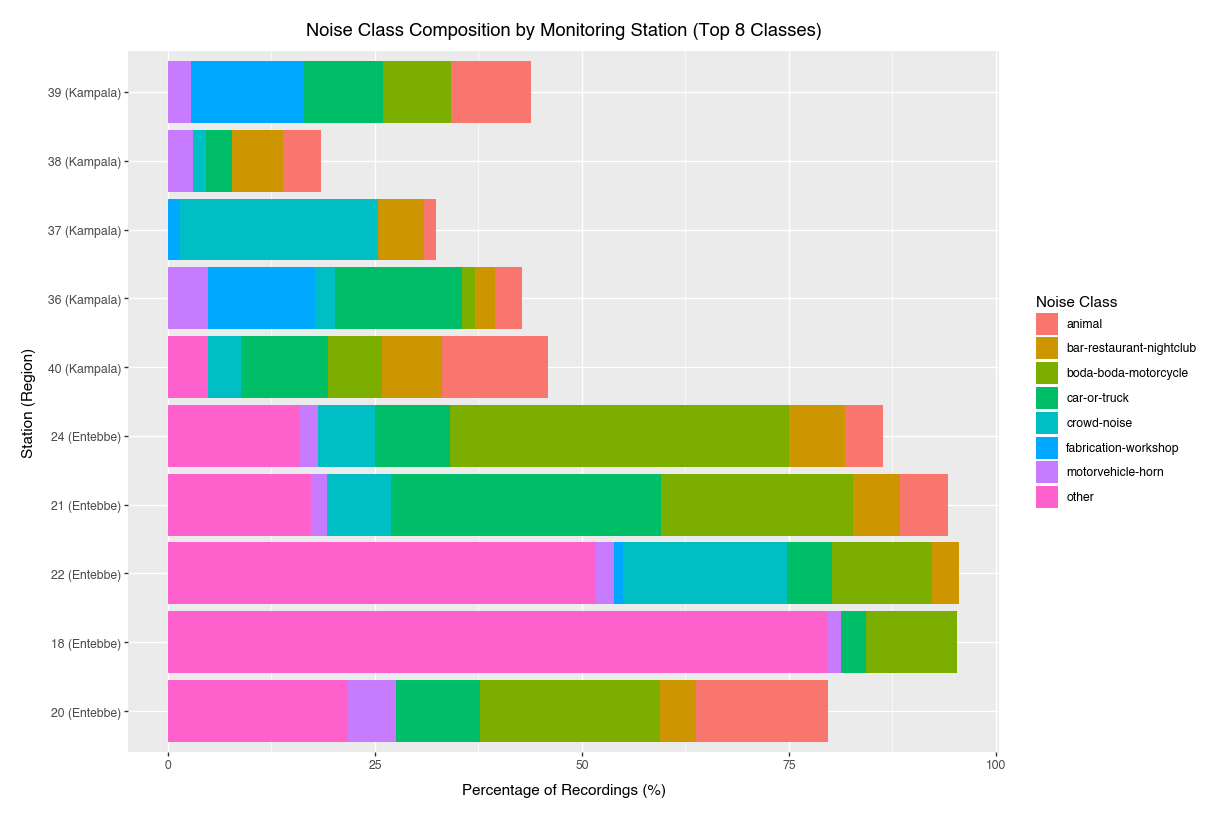

In [32]:
from plotnine import *

# Calculate percentage composition for each station
station_class_pct = (
    df[df['submitter_id'].isin(top_10_stations)]
    .groupby(['submitter_id', 'class'])
    .size()
    .reset_index(name='count')
)

# Add total recordings per station
station_totals = station_class_pct.groupby('submitter_id')['count'].sum().reset_index()
station_totals.columns = ['submitter_id', 'total']
station_class_pct = station_class_pct.merge(station_totals, on='submitter_id')
station_class_pct['percentage'] = station_class_pct['count'] / station_class_pct['total'] * 100

# Add station metadata
station_class_pct['region'] = station_class_pct['submitter_id'].map(station_info_dict['region'])
station_class_pct['avg_noise'] = station_class_pct['submitter_id'].map(station_info_dict['noise_measurement'])

# Create label and order
station_class_pct['station_label'] = (
    station_class_pct['submitter_id'].astype(str) + 
    ' (' + station_class_pct['region'] + ')'
)

# Order by avg noise
station_order_pct = (
    station_class_pct.groupby('station_label')['avg_noise']
    .first()
    .sort_values()
    .index
)

station_class_pct['station_label'] = pd.Categorical(
    station_class_pct['station_label'],
    categories=station_order_pct,
    ordered=True
)

# Filter to top 8 classes only for cleaner visualization
top_8_for_viz = df['class'].value_counts().head(8).index
station_class_pct_filtered = station_class_pct[station_class_pct['class'].isin(top_8_for_viz)]

p_stacked = (
    ggplot(station_class_pct_filtered, aes(x='station_label', y='percentage', fill='class'))
    + geom_col(position='stack')
    + coord_flip()
    + labs(
        title='Noise Class Composition by Monitoring Station (Top 8 Classes)',
        x='Station (Region)',
        y='Percentage of Recordings (%)',
        fill='Noise Class'
    )
    + theme(figure_size=(12, 8))
)

p_stacked


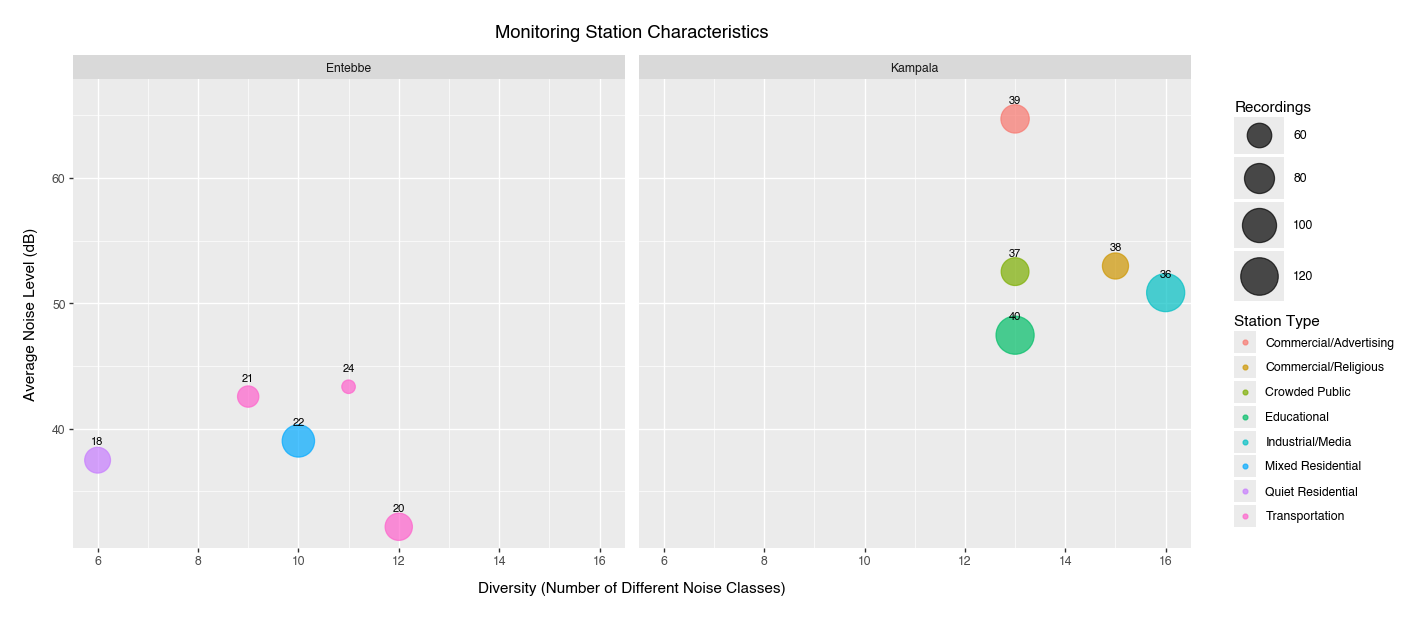

In [ ]:
from plotnine import *

# Create station type categorization
station_types = {
    36: 'Industrial/Media',
    40: 'Educational',
    22: 'Mixed Residential',
    39: 'Commercial/Advertising',
    37: 'Crowded Public',
    20: 'Transportation',
    38: 'Commercial/Religious',
    18: 'Quiet Residential',
    21: 'Transportation',
    24: 'Transportation'
}

# Create a summary dataframe
station_summary = []
for station in top_10_stations:
    station_data = df[df['submitter_id'] == station]
    station_summary.append({
        'station_id': station,
        'region': station_data['region'].iloc[0],
        'avg_noise': station_data['noise_measurement'].mean(),
        'recordings': len(station_data),
        'diversity': station_data['class'].nunique(),
        'station_type': station_types.get(station, 'General Urban'),
        'lat': station_data['latitude'].mean(),
        'lon': station_data['longitude'].mean()
    })

station_df = pd.DataFrame(station_summary)
station_df['station_label'] = station_df['station_id'].astype(str) + '\n' + station_df['station_type']

p_types = (
    ggplot(station_df, aes(x='diversity', y='avg_noise', color='station_type', size='recordings'))
    + geom_point(alpha=0.7)
    + geom_text(aes(label='station_id'), nudge_y=1.5, size=8, color='black')
    + scale_size_continuous(range=(5, 15))
    + labs(
        title='Monitoring Station Characteristics',
        x='Diversity (Number of Different Noise Classes)',
        y='Average Noise Level (dB)',
        color='Station Type',
        size='Recordings'
    )
    + facet_wrap('~region')
    + theme(figure_size=(14, 6))
)

p_types

In [34]:
from plotnine import *
import pandas as pd

# Prepare comprehensive station data
all_stations = df['submitter_id'].unique()

station_map_data = []
for station_id in all_stations:
    station_data = df[df['submitter_id'] == station_id]
    
    # Get top noise class
    top_class = station_data['class'].value_counts().index[0]
    top_class_count = station_data['class'].value_counts().iloc[0]
    top_class_pct = top_class_count / len(station_data) * 100
    
    station_map_data.append({
        'station_id': station_id,
        'lat': station_data['latitude'].mean(),
        'lon': station_data['longitude'].mean(),
        'avg_noise': station_data['noise_measurement'].mean(),
        'max_noise': station_data['noise_measurement'].max(),
        'min_noise': station_data['noise_measurement'].min(),
        'recordings': len(station_data),
        'region': station_data['region'].iloc[0],
        'top_source': top_class,
        'top_source_pct': top_class_pct,
        'diversity': station_data['class'].nunique()
    })

map_df = pd.DataFrame(station_map_data)

# Create labels with station info
map_df['label'] = (
    map_df['station_id'].astype(str) + '\n' + 
    map_df['avg_noise'].round(0).astype(int).astype(str) + ' dB'
)

print("=" * 80)
print("MAP DATA SUMMARY")
print("=" * 80)
print(f"\nTotal stations: {len(map_df)}")
print(f"\nKampala: {len(map_df[map_df['region']=='Kampala'])} stations")
print(f"Entebbe: {len(map_df[map_df['region']=='Entebbe'])} stations")
print(f"\nNoise range: {map_df['avg_noise'].min():.1f} - {map_df['avg_noise'].max():.1f} dB")

# Show the data
map_df[['station_id', 'region', 'lat', 'lon', 'avg_noise', 'top_source', 'recordings']]


MAP DATA SUMMARY

Total stations: 19

Kampala: 10 stations
Entebbe: 9 stations

Noise range: 32.2 - 68.8 dB


,station_id,region,lat,lon,avg_noise,top_source,recordings
0,36,Kampala,0.314909,32.578055,50.846774,community-radio,124
1,18,Entebbe,0.085559,32.494449,37.484375,other,64
2,22,Entebbe,0.074934,32.473178,39.021978,other,91
3,20,Entebbe,0.073902,32.481483,32.173913,boda-boda-motorcycle,69
4,42,Kampala,0.339505,32.579946,51.585366,motorvehicle-horn,41
5,24,Entebbe,0.089210,32.478979,43.340909,boda-boda-motorcycle,44
6,27,Entebbe,0.094076,32.491293,63.833333,boda-boda-motorcycle,12
7,37,Kampala,0.318291,32.586432,52.521127,crowd-noise,71
8,38,Kampala,0.359325,32.567600,52.969231,generator,65
9,35,Kampala,0.298267,32.567471,49.307692,motorvehicle-horn,26


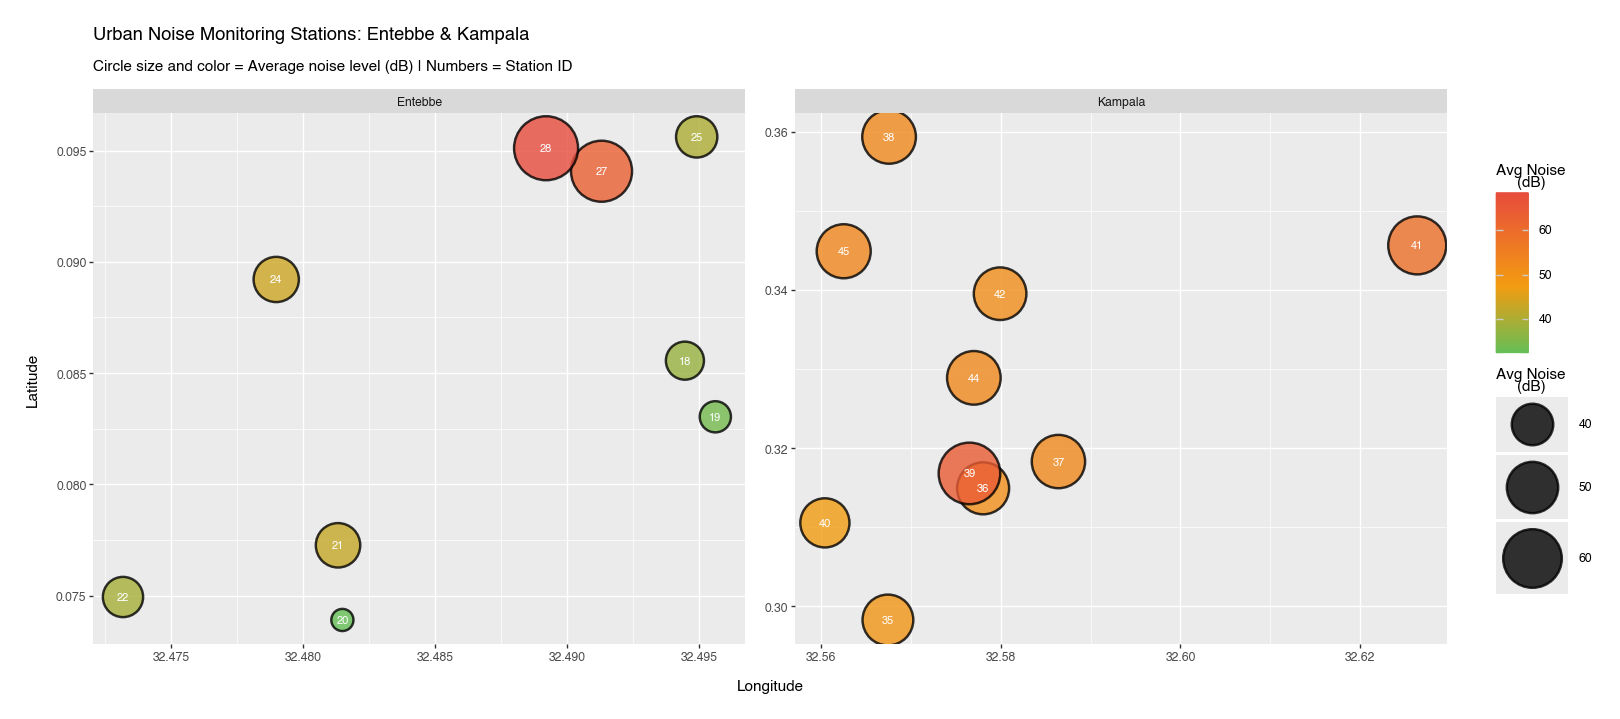

In [35]:
from plotnine import *

# Create the main map
p_main_map = (
    ggplot(map_df, aes(x='lon', y='lat'))
    + geom_point(aes(size='avg_noise', fill='avg_noise'), shape='o', alpha=0.8, stroke=1, color='black')
    + scale_fill_gradient2(
        low='#2ecc71',      # Green for quiet
        mid='#f39c12',      # Orange for moderate
        high='#e74c3c',     # Red for loud
        midpoint=47.5
    )
    + scale_size_continuous(range=(8, 25))
    + geom_text(aes(label='station_id'), size=8, fontweight='bold', color='white')
    + facet_wrap('~region', scales='free')
    + labs(
        title='Urban Noise Monitoring Stations: Entebbe & Kampala',
        subtitle='Circle size and color = Average noise level (dB) | Numbers = Station ID',
        x='Longitude',
        y='Latitude',
        fill='Avg Noise\n(dB)',
        size='Avg Noise\n(dB)'
    )
    + theme(
        figure_size=(16, 7),
        legend_position='right'
    )
)

p_main_map


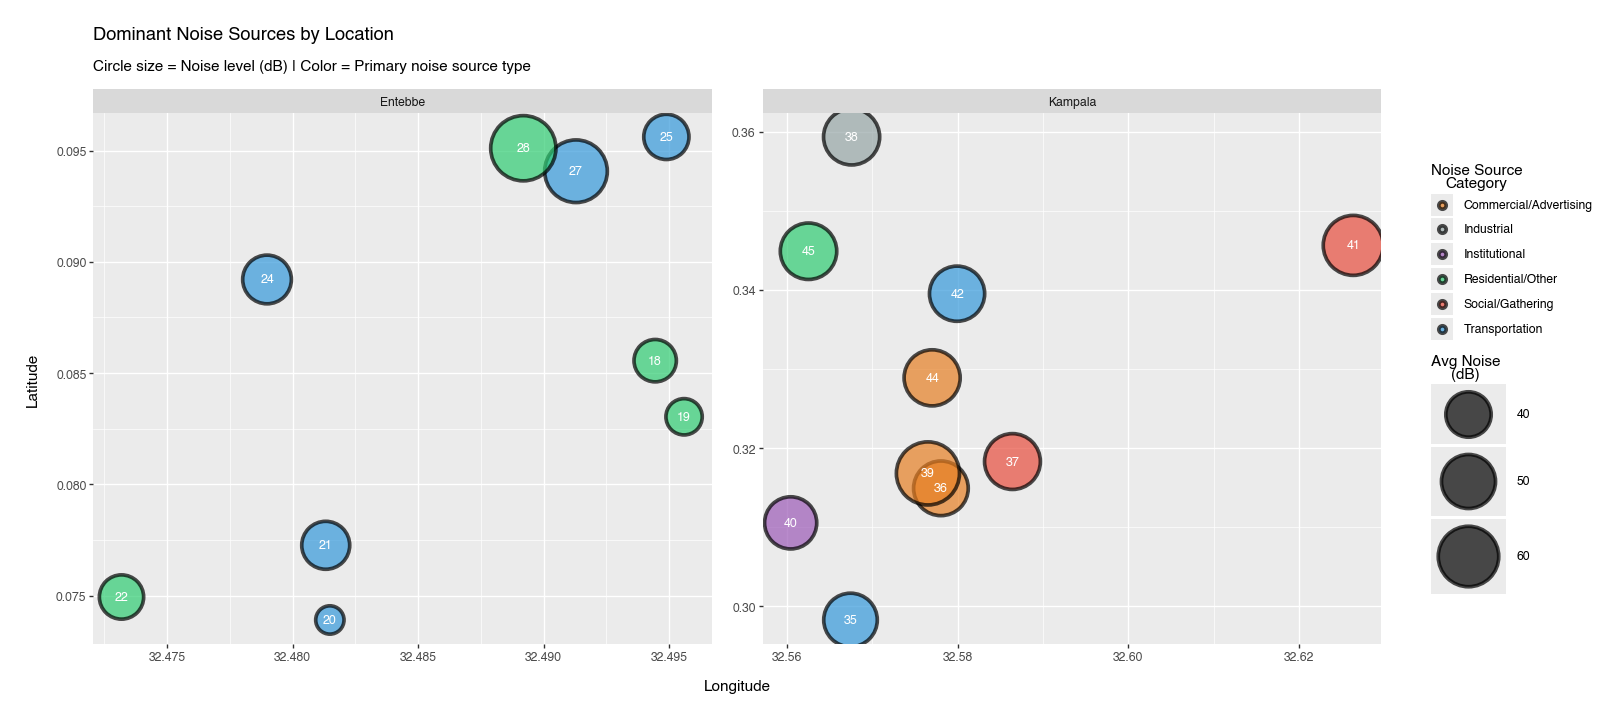

In [36]:
from plotnine import *

# Create a simplified category for visualization
def categorize_source(source):
    if source in ['boda-boda-motorcycle', 'car-or-truck', 'motorvehicle-horn', 'motorvehicle-siren']:
        return 'Transportation'
    elif source in ['fabrication-workshop', 'construction-site', 'generator']:
        return 'Industrial'
    elif source in ['herbalists', 'street-preacher', 'hawker-vendor', 'community-radio', 'mobile-music']:
        return 'Commercial/Advertising'
    elif source in ['school', 'religious-venue']:
        return 'Institutional'
    elif source in ['crowd-noise', 'bar-restaurant-nightclub']:
        return 'Social/Gathering'
    elif source == 'animal':
        return 'Animal'
    else:
        return 'Residential/Other'

map_df['source_category'] = map_df['top_source'].apply(categorize_source)

# Create abbreviated labels for the map
def abbreviate_source(source):
    abbrev = {
        'boda-boda-motorcycle': 'Motorcycles',
        'car-or-truck': 'Vehicles',
        'motorvehicle-horn': 'Vehicle Horn',
        'fabrication-workshop': 'Workshop',
        'construction-site': 'Construction',
        'generator': 'Generator',
        'herbalists': 'Herbalists',
        'street-preacher': 'Preacher',
        'crowd-noise': 'Crowds',
        'community-radio': 'Radio',
        'school': 'School',
        'bar-restaurant-nightclub': 'Bar/Club',
        'other': 'Residential',
        'animal': 'Animals'
    }
    return abbrev.get(source, source)

map_df['source_abbrev'] = map_df['top_source'].apply(abbreviate_source)

p_sources = (
    ggplot(map_df, aes(x='lon', y='lat'))
    + geom_point(
        aes(size='avg_noise', fill='source_category'), 
        shape='o', 
        alpha=0.7, 
        stroke=1.5, 
        color='black'
    )
    + scale_fill_manual(values={
        'Transportation': '#3498db',          # Blue
        'Industrial': '#95a5a6',              # Gray
        'Commercial/Advertising': '#e67e22', # Orange
        'Institutional': '#9b59b6',          # Purple
        'Social/Gathering': '#e74c3c',       # Red
        'Residential/Other': '#2ecc71',      # Green
        'Animal': '#f39c12'                  # Yellow
    })
    + scale_size_continuous(range=(10, 25))
    + geom_text(
        aes(label='station_id'), 
        size=9, 
        fontweight='bold', 
        color='white'
    )
    + facet_wrap('~region', scales='free')
    + labs(
        title='Dominant Noise Sources by Location',
        subtitle='Circle size = Noise level (dB) | Color = Primary noise source type',
        x='Longitude',
        y='Latitude',
        fill='Noise Source\nCategory',
        size='Avg Noise\n(dB)'
    )
    + theme(
        figure_size=(16, 7),
        legend_position='right'
    )
)

p_sources


In [37]:
print("=" * 100)
print("NOISE MAP REFERENCE GUIDE")
print("=" * 100)

# Sort by region and noise level
map_df_sorted = map_df.sort_values(['region', 'avg_noise'], ascending=[True, False])

print("\n🌳 ENTEBBE MONITORING STATIONS")
print("=" * 100)
print(f"{'ID':<4} {'Coordinates':<20} {'Noise':<12} {'Top Source':<25} {'Category':<25}")
print("-" * 100)

for _, row in map_df_sorted[map_df_sorted['region'] == 'Entebbe'].iterrows():
    coord = f"({row['lat']:.4f}, {row['lon']:.4f})"
    noise = f"{row['avg_noise']:.1f} dB"
    print(f"{row['station_id']:<4} {coord:<20} {noise:<12} {row['source_abbrev']:<25} {row['source_category']:<25}")

print("\n\n🏙️ KAMPALA MONITORING STATIONS")
print("=" * 100)
print(f"{'ID':<4} {'Coordinates':<20} {'Noise':<12} {'Top Source':<25} {'Category':<25}")
print("-" * 100)

for _, row in map_df_sorted[map_df_sorted['region'] == 'Kampala'].iterrows():
    coord = f"({row['lat']:.4f}, {row['lon']:.4f})"
    noise = f"{row['avg_noise']:.1f} dB"
    print(f"{row['station_id']:<4} {coord:<20} {noise:<12} {row['source_abbrev']:<25} {row['source_category']:<25}")

print("\n\n" + "=" * 100)
print("KEY FINDINGS FROM THE MAP")
print("=" * 100)

# Identify hotspots
hotspots = map_df[map_df['avg_noise'] > 55].sort_values('avg_noise', ascending=False)
print("\n🔥 NOISE HOTSPOTS (>55 dB):")
for _, row in hotspots.iterrows():
    print(f"   Station {row['station_id']} ({row['region']}): {row['avg_noise']:.1f} dB - {row['source_abbrev']}")

# Identify quiet zones
quiet_zones = map_df[map_df['avg_noise'] < 40].sort_values('avg_noise')
print("\n🔇 QUIET ZONES (<40 dB):")
for _, row in quiet_zones.iterrows():
    print(f"   Station {row['station_id']} ({row['region']}): {row['avg_noise']:.1f} dB - {row['source_abbrev']}")

# Geographic patterns
print("\n\n📍 GEOGRAPHIC PATTERNS:")
print(f"   • Northern Entebbe (lat ~0.095): Mixed - includes LOUDEST spot (Station 28: 68.8 dB)")
print(f"   • Southern Entebbe (lat ~0.074): Quietest areas (Stations 20, 22, 19: 32-39 dB)")
print(f"   • Central Kampala cluster (lat ~0.31-0.32): Moderate to loud (47-65 dB)")
print(f"   • Northern Kampala (lat ~0.34-0.36): Loud commercial/entertainment zones (53-59 dB)")

print("\n\n🎯 NOISE SOURCE DISTRIBUTION:")
source_counts = map_df.groupby('source_category').size().sort_values(ascending=False)
for category, count in source_counts.items():
    pct = count/len(map_df)*100
    print(f"   • {category:<30}: {count:2d} stations ({pct:4.1f}%)")


NOISE MAP REFERENCE GUIDE

🌳 ENTEBBE MONITORING STATIONS
ID   Coordinates          Noise        Top Source                Category                 
----------------------------------------------------------------------------------------------------
28   (0.0951, 32.4892)    68.8 dB      Residential               Residential/Other        
27   (0.0941, 32.4913)    63.8 dB      Motorcycles               Transportation           
24   (0.0892, 32.4790)    43.3 dB      Motorcycles               Transportation           
21   (0.0773, 32.4813)    42.6 dB      Vehicles                  Transportation           
25   (0.0956, 32.4949)    39.9 dB      Vehicles                  Transportation           
22   (0.0749, 32.4732)    39.0 dB      Residential               Residential/Other        
18   (0.0856, 32.4944)    37.5 dB      Residential               Residential/Other        
19   (0.0830, 32.4956)    33.9 dB      Residential               Residential/Other        
20   (0.0739, 32.4815) 

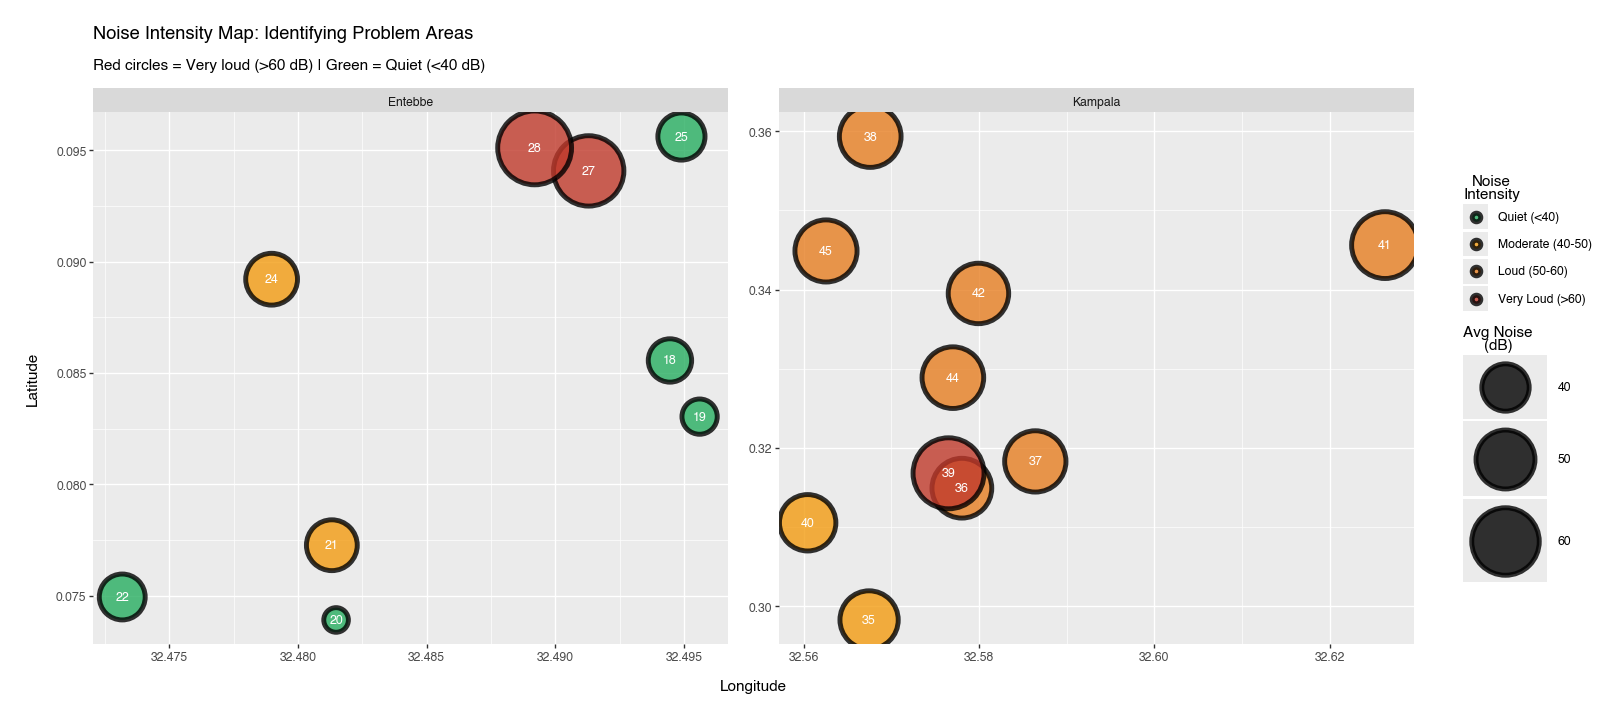

In [ ]:
from plotnine import *

# Create a plot showing noise intensity
map_df['intensity'] = pd.cut(
    map_df['avg_noise'], 
    bins=[0, 40, 50, 60, 100],
    labels=['Quiet (<40)', 'Moderate (40-50)', 'Loud (50-60)', 'Very Loud (>60)']
)

# Separate hotspots data
hotspots_df = map_df[map_df['avg_noise'] > 60].copy()

p_intensity = (
    ggplot(map_df, aes(x='lon', y='lat'))
    + geom_point(
        aes(size='avg_noise', fill='intensity'), 
        shape='o', 
        alpha=0.8, 
        stroke=2, 
        color='black'
    )
    + scale_fill_manual(values={
        'Quiet (<40)': '#27ae60',
        'Moderate (40-50)': '#f39c12', 
        'Loud (50-60)': '#e67e22',
        'Very Loud (>60)': '#c0392b'
    })
    + scale_size_continuous(range=(8, 28))
    + geom_text(
        aes(label='station_id'), 
        size=9, 
        fontweight='bold', 
        color='white'
    )
    + facet_wrap('~region', scales='free')
    + labs(
        title='Noise Intensity Map: Identifying Problem Areas',
        subtitle='Red circles = Very loud (>60 dB) | Green = Quiet (<40 dB)',
        x='Longitude',
        y='Latitude',
        fill='Noise\nIntensity',
        size='Avg Noise\n(dB)'
    )
    + theme(
        figure_size=(16, 7),
        legend_position='right'
    )
)

p_intensity